In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# The most simple way of creating a figure with an axes is using 
fig, ax = plt.subplots()
# Then use Axes.plot to draw data on the axes
ax.plot([1,2,3,4], [1,4,2,3])


In [ ]:
# Can also explicitly create a plot without creating an Axes first (it will create one if non-existent or use the current axes)
plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot.

Anatomy of a figure

In [ ]:
# creating a figure:
fig = plt.figure() # empty figure no axes
fig, ax = plt.subplots() # figure with single Axes
fig, ax = plt.subplots(2, 2) # figure with 2x2 gird of Axes

# Each Axes contains two (or three) Axis objects.
# set limits with:
axes.Axes.set_xlim()
# set a title with:
set_title()
set_xlabel()
set_ylabel()

# the Axis object are number-line-like objects (ie. 1 row vectors?). The set the limits and generate the ticks and ticklabels. The location of ticks is determined by a Locator, and of the ticklabels by a Formatter. 

# Everything on the figure is an artist (Figure, Axes, Axis objects). Includes: Text, Line2D, collections, Patch objects... When the figure is redenred all of the artists are drawn to the canvas. 

Inputs to plotting functions: 

Matplotlib expects numpy.array or numpy.ma.masked_array. Pandas data frame or numpy.matrix may not work as *expected* so best to convert into numpy arrays.

In [ ]:
# To convert a pandas.DataFrame to numpy:
a = pandas.DataFrame( np.random.rand(4, 5), columns = list('abcde') )
a_array = a.values

In [ ]:
# To convert a numpy.matrix
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

NameError: name 'np' is not defined

The "object-oriented" interface for pyplot

Consists of getting an Axes object and calling plotting functions from this object. The py-plot style would be to simply call plt.plot() functions and get the output as the functions stack up over time. I can see the usefulness to calling the methods from the Axes object although I also think it can sometimes get in way. The Axes object method is more scalable if plotting several things at once, I suppose.

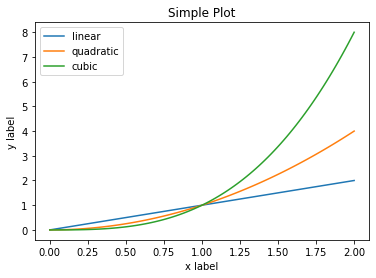

In [ ]:
x = np.linspace(0, 2, 100) # this would be the input signal

fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

In [ ]:
# Recommended function signature for plots recycling
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

# Then called as:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, ax = plt.subplots(1, 1)
my_plotter(ax, data1, data2, {'marker': 'x'})

# This could easily scale to 2 grids:
fig, (ax1, ax2) = plt.subplots(1, 2)
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

Backends

The plots generated by matplotlib may be consumed in a different number of ways (either at a prototyping/development level in notebooks, etc., or at a production level in GUI or websites). Therefore, there's two different backends to choose from depending on whether you are looking for a dynamic backend (that serves interactive plots) or a static backend (that serves non-iteractive plots in image format).
Selecting a backend:

1. rcParams["backend"] - added to the matplotlibrc file

2. MPLBACKEND  - env variable

3. matplotlib.use()

Basic plotting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

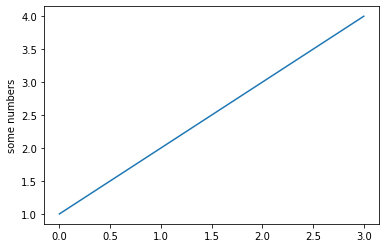

In [ ]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

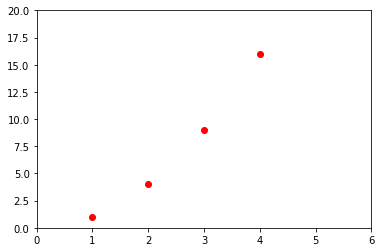

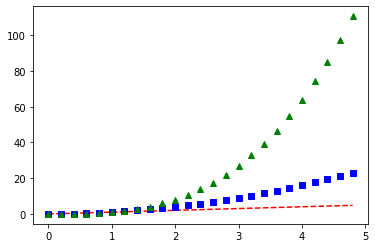

In [ ]:
# Formatting options
# for each x,y pair there is an optional third argument that indicates coloar and line type of the plot.
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()


# using numpy arrays (the norm, really)

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

### Plotting with keyword strings

In cases where the data to plot is a multi-dimensional format, which contains strings as a reference to particular signals, then this can be used through the "data" parameter of the pyplot functions. See below.

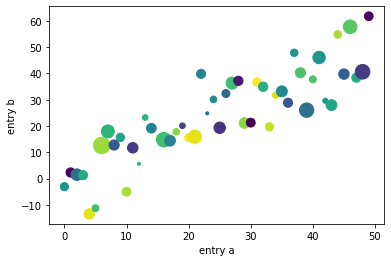

In [ ]:
# Data is a dictionary containing keywords for three different signals
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}

# Creating new entry in dictionary
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

# Here, plotting data['a'] vs. data['b']
plt.scatter('a', 'b', c='c', s='d', data=data)
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

### Plotting with categorical variables

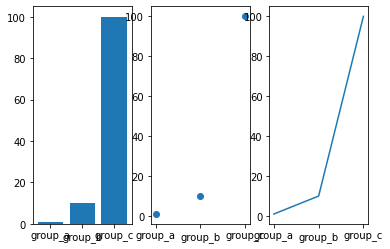

In [ ]:
names = ['group_a', 'group_b', 'group_c']
values = [ 1, 10, 100 ]


# plt.figure(figsize=(9, 3))
fig, ax = plt.subplots(1, 3)

ax[0].bar(names, values)
ax[1].scatter(names, values)
ax[2].plot(names, values)
plt.show()

### Line properties

In [ ]:
# Keyword args
plt.plot(x, y, linewidth=2.0)

# Setter methods of Line2D instance.
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # turn off anti aliasing


NameError: name 'y' is not defined

Line 2D properties:
- alpha
- dashes
- data
- label
- linestyle or ls
- linewidth or ls
- marker
- markeredgecolor or mec
- markeredgewidth or mew
- markerfacecolor or mfc
- markersize or ms
- markevery
- visible

### Working with multiple figures and axes

In [ ]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

### Working with text

### Logarithmic and other nonlinear axes

In [ ]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# make up some data in the open interval (0, 1)
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)

# symmetric log
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthresh=0.01)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

plt.show()

NameError: name 'np' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18cf4704-3790-49a3-8d94-41dc8f485b71' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>